<a href="https://colab.research.google.com/github/XyonX/BatchScripting/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd

In [2]:
# Define the stock ticker and date range
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2025-01-01"

# Fetch the data
data = yf.download(ticker, start=start_date, end=end_date)

# Access the Close prices properly from MultiIndex
closing_prices = data['Close'][ticker].tolist()  # Modified this lineV

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [8]:
def make_dataset(raw_data,window_size=20):
    size=len(raw_data)
    x=[]
    y=[]
    for i in range(size-window_size):
        block=raw_data[i:i+window_size]
        x_i=[p/block[0] for  p in block ]
        y_i = (raw_data[i + window_size] - block[-1]) / block[-1]
        x.append(x_i)
        y.append(y_i)

    return x,y

def split_dataset(data, train_ratio, val_ratio, test_ratio):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1"

    length = len(data)
    train_end = int(length * train_ratio)
    val_end = train_end + int(length * val_ratio)

    x_train = data[:train_end]
    x_validation = data[train_end:val_end]
    x_test = data[val_end:]

    return x_train, x_validation, x_test

In [9]:
X,Y= make_dataset(closing_prices)


X_train, X_validation, X_test = split_dataset(X,0.7,0.15,0.15)
Y_train, Y_validation, Y_test = split_dataset(Y,0.7,0.15,0.15)

In [29]:
# Import pandas if you haven't already
import pandas as pd

# Function to save a dataset (list of lists) to CSV
def save_to_csv(data, filename):
    # Convert list of lists to pandas DataFrame
    df = pd.DataFrame(data)
    # Save DataFrame to CSV
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

# Save each dataset to a separate CSV file
save_to_csv(X_train, 'X_train.csv')
save_to_csv(X_validation, 'X_validation.csv')
save_to_csv(X_test, 'X_test.csv')
save_to_csv(Y_train, 'Y_train.csv')
save_to_csv(Y_validation, 'Y_validation.csv')
save_to_csv(Y_test, 'Y_test.csv')

Data saved to X_train.csv
Data saved to X_validation.csv
Data saved to X_test.csv
Data saved to Y_train.csv
Data saved to Y_validation.csv
Data saved to Y_test.csv


In [10]:
print("X_train:", type(X_train), "Shape/Length:", X_train.shape if hasattr(X_train, 'shape') else len(X_train))
print("X_validation:", type(X_validation), "Shape/Length:", X_validation.shape if hasattr(X_validation, 'shape') else len(X_validation))
print("X_test:", type(X_test), "Shape/Length:", X_test.shape if hasattr(X_test, 'shape') else len(X_test))

print("Y_train:", type(Y_train), "Shape/Length:", Y_train.shape if hasattr(Y_train, 'shape') else len(Y_train))
print("Y_validation:", type(Y_validation), "Shape/Length:", Y_validation.shape if hasattr(Y_validation, 'shape') else len(Y_validation))
print("Y_test:", type(Y_test), "Shape/Length:", Y_test.shape if hasattr(Y_test, 'shape') else len(Y_test))


X_train: <class 'list'> Shape/Length: 866
X_validation: <class 'list'> Shape/Length: 185
X_test: <class 'list'> Shape/Length: 187
Y_train: <class 'list'> Shape/Length: 866
Y_validation: <class 'list'> Shape/Length: 185
Y_test: <class 'list'> Shape/Length: 187


In [11]:
print("Sample X_train[0]:", X_train[0])
print("Sample Y_train[0]:", Y_train[0])


Sample X_train[0]: [1.0, 0.9902778351218918, 0.9981686303567588, 0.9934744324219664, 1.0094554228218788, 1.0308972187912058, 1.0332279287232449, 1.0553023834805246, 1.0410520121795748, 1.0365904124773508, 1.0495751510286377, 1.0611952922706052, 1.0540035524284717, 1.0577659916800433, 1.0628598299385443, 1.059796761253463, 1.0286331155797848, 1.0577325832618152, 1.0798735396817942, 1.0783084918631065]
Sample Y_train[0]: -0.04433861333797352


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [14]:
window_size = 20

In [15]:
# Define the MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),  # Hidden layer 1
    Dropout(0.2),  # Regularization to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer 2
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Convert the datasets to NumPy arrays before training
X_train = np.array(X_train)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation = np.array(Y_validation)
Y_test = np.array(Y_test)

# Train the model
history = model.fit(X_train, Y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_validation, Y_validation),
                    verbose=1)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0554 - mae: 0.1802 - val_loss: 1.7748e-04 - val_mae: 0.0101
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mae: 0.0804 - val_loss: 6.5275e-04 - val_mae: 0.0233
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mae: 0.0473 - val_loss: 2.9666e-04 - val_mae: 0.0144
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0364 - val_loss: 1.6185e-04 - val_mae: 0.0098
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0274 - val_loss: 1.7094e-04 - val_mae: 0.0098
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0246 - val_loss: 1.7341e-04 - val_mae: 0.0099
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9099e-04 - mae: 0.0227 - val_loss: 1.8441e-04 - val_mae: 0.0102
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9187e-04 - mae: 0.0208 - val_loss: 2.0214e-04 - val_mae: 0.0107
Epoch 9/50
28/28 ━━━━━━━━━━━━━━

In [19]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, Y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

Test Loss (MSE): 0.0002, Test MAE: 0.0104


In [20]:
# Make predictions
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


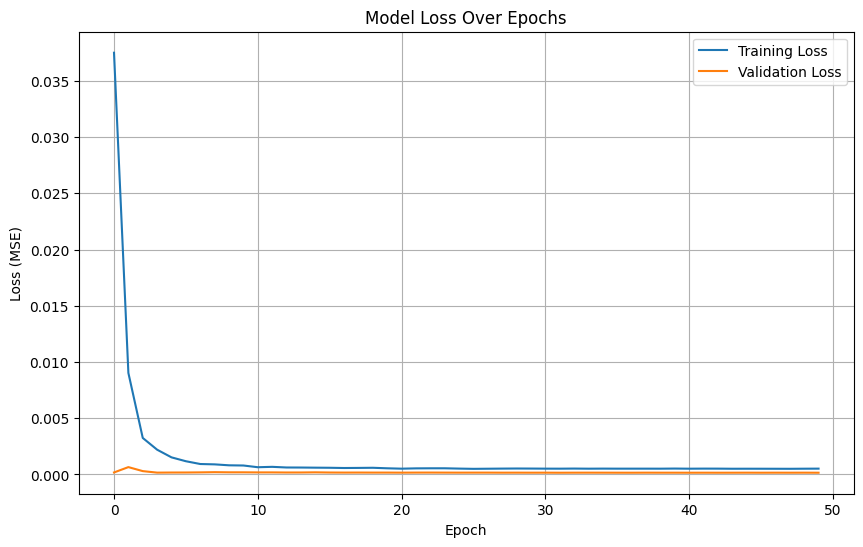

In [24]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('training_loss.png')
# plt.close() # Comment out or remove this line
plt.show() # Add this line to display the plot

In [25]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [27]:
print("Training Loss History:", history.history['loss'])
print("Validation Loss History:", history.history['val_loss'])
print("Training MAE History:", history.history['mae'])
print("Validation MAE History:", history.history['val_mae'])

Training Loss History: [0.03750603273510933, 0.009026006795465946, 0.003245757194235921, 0.0022009536623954773, 0.0015197517350316048, 0.0011752218706533313, 0.0009282258106395602, 0.000896878947969526, 0.0008134552626870573, 0.0007958381320349872, 0.000642733764834702, 0.0006769016617909074, 0.0006193199078552425, 0.000615160446614027, 0.0006033596000634134, 0.0005940939881838858, 0.0005732236313633621, 0.0005815753829665482, 0.0005936755333095789, 0.0005476006190292537, 0.0005139911081641912, 0.0005410139565356076, 0.0005476533551700413, 0.000548123731277883, 0.0005204862100072205, 0.0004990566521883011, 0.0005096591776236892, 0.0005203017499297857, 0.000528582779224962, 0.0005237234872765839, 0.0005162822199054062, 0.0005139377899467945, 0.0005232897819951177, 0.000512648606672883, 0.0005192031967453659, 0.0005146139883436263, 0.000514868414029479, 0.0005153054371476173, 0.0005131631041876972, 0.0005237878067418933, 0.0005120920250192285, 0.0005190686788409948, 0.0005172346718609333

In [28]:

# Save the trained model
model.save('my_stock_prediction_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [1]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import yfinance as yf
import pandas as pd

# Assuming you have the make_dataset function defined (from your previous code)
def make_dataset(raw_data,window_size=20):
    size=len(raw_data)
    x=[]
    y=[]
    for i in range(size-window_size):
        block=raw_data[i:i+window_size]
        x_i=[p/block[0] for  p in block ]
        y_i = (raw_data[i + window_size] - block[-1]) / block[-1]
        x.append(x_i)
        y.append(y_i)

    return x,y

# --- Inference Code ---

# Load the saved model
# Make sure the model file 'my_stock_prediction_model.keras' exists in the same directory,
# or provide the full path to the file.
try:
    loaded_model = tf.keras.models.load_model('my_stock_prediction_model.keras')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")
    # Exit or handle the error if the model cannot be loaded
    exit()

# Prepare new data for inference
# You'll need to get the most recent stock data to make a prediction about the next step.
# Define the stock ticker and the required date range for the window size
ticker = "AAPL"
window_size = 20 # This should match the window_size used during training

# Fetch the data for the last 'window_size' days
# We fetch data up to the current date to get the most recent window.
# You might need to adjust the end date based on when you run this code.
# Let's fetch data for a bit longer than the window size to ensure we have enough
# data points, in case there are gaps (like weekends or holidays).
end_date_inference = pd.Timestamp.now().strftime('%Y-%m-%d')
start_date_inference = (pd.Timestamp.now() - pd.Timedelta(days=window_size + 5)).strftime('%Y-%m-%d') # Fetch a few extra days


try:
    # Fetch the data
    inference_data = yf.download(ticker, start=start_date_inference, end=end_date_inference)

    # Access the Close prices and get the last 'window_size' values
    # Ensure there are enough data points
    if len(inference_data['Close']) < window_size:
        print(f"Not enough data points ({len(inference_data)}) to form a window of size {window_size}.")
        # Exit or handle the error
        exit()

    # Get the last 'window_size' closing prices
    raw_inference_window = inference_data['Close'][ticker].tail(window_size).tolist()

    # Prepare the inference data in the same format as your training data (normalized)
    # Apply the same normalization logic as in your make_dataset function
    if raw_inference_window: # Check if the list is not empty
        first_price = raw_inference_window[0]
        inference_window_normalized = [p / first_price for p in raw_inference_window]
    else:
        print("Could not get enough data to create an inference window.")
        exit()


    # Convert the normalized window to a NumPy array and reshape for the model
    # The model expects an input shape like (batch_size, window_size).
    # For a single prediction, batch_size is 1.
    inference_input = np.array(inference_window_normalized).reshape(1, window_size)

    # Make a prediction
    prediction = loaded_model.predict(inference_input)

    # The prediction is likely the normalized price change.
    # To get the actual predicted price, you need the last price from your input window
    last_price_in_window = raw_inference_window[-1]

    # The prediction is the percentage change (as per your make_dataset function's y calculation)
    # Predicted price = last_price_in_window * (1 + predicted_percentage_change)
    predicted_price_change_ratio = prediction[0][0] # Get the scalar prediction value
    predicted_next_price = last_price_in_window * (1 + predicted_price_change_ratio)


    print(f"\nUsing the last {window_size} days of data.")
    print(f"Last closing price in window: {last_price_in_window:.2f}")
    print(f"Predicted price change ratio: {predicted_price_change_ratio:.6f}")
    print(f"Predicted next closing price: {predicted_next_price:.2f}")

except Exception as e:
    print(f"Error during data fetching or prediction: {e}")

Model loaded successfully!
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Error during data fetching or prediction: 'DataFrame' object has no attribute 'tolist'


In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import yfinance as yf
import pandas as pd

# Assuming you have the make_dataset function defined (from your previous code)
def make_dataset(raw_data,window_size=20):
    size=len(raw_data)
    x=[]
    y=[]
    for i in range(size-window_size):
        block=raw_data[i:i+window_size]
        x_i=[p/block[0] for  p in block ]
        y_i = (raw_data[i + window_size] - block[-1]) / block[-1]
        x.append(x_i)
        y.append(y_i)

    return x,y

# --- Inference Code ---

# Load the saved model
# Make sure the model file 'my_stock_prediction_model.keras' exists in the same directory,
# or provide the full path to the file.
try:
    loaded_model = tf.keras.models.load_model('my_stock_prediction_model.keras')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading the model: {e}")
    # Exit or handle the error if the model cannot be loaded
    exit()

# Prepare new data for inference
# You'll need to get the most recent stock data to make a prediction about the next step.
# Define the stock ticker and the required date range for the window size
ticker = "AAPL"
window_size = 20 # This should match the window_size used during training

# Fetch the data for the last 'window_size' days
# We fetch data up to the current date to get the most recent window.
# You might need to adjust the end date based on when you run this code.
# Let's fetch data for a bit longer than the window size to ensure we have enough
# data points, in case there are gaps (like weekends or holidays).
end_date_inference = pd.Timestamp.now().strftime('%Y-%m-%d')
# Request data for a longer period to ensure we get enough trading days
start_date_inference = (pd.Timestamp.now() - pd.Timedelta(days=window_size * 2)).strftime('%Y-%m-%d') # Increased the number of days requested


try:
    # Fetch the data
    inference_data = yf.download(ticker, start=start_date_inference, end=end_date_inference)

    # Access the Close prices and get the last 'window_size' values
    # Ensure there are enough data points
    if len(inference_data['Close']) < window_size:
        print(f"Not enough data points ({len(inference_data)}) to form a window of size {window_size}.")
        # Exit or handle the error
        exit()

    # Get the last 'window_size' closing prices
    # Use .iloc[-window_size:] to reliably get the last N rows as a Series, then convert to list
    raw_inference_window = inference_data['Close'].iloc[-window_size:].tolist()


    # Prepare the inference data in the same format as your training data (normalized)
    # Apply the same normalization logic as in your make_dataset function
    if raw_inference_window: # Check if the list is not empty
        first_price = raw_inference_window[0]
        inference_window_normalized = [p / first_price for p in raw_inference_window]
    else:
        print("Could not get enough data to create an inference window.")
        exit()


    # Convert the normalized window to a NumPy array and reshape for the model
    # The model expects an input shape like (batch_size, window_size).
    # For a single prediction, batch_size is 1.
    inference_input = np.array(inference_window_normalized).reshape(1, window_size)

    # Make a prediction
    prediction = loaded_model.predict(inference_input)

    # The prediction is likely the normalized price change.
    # To get the actual predicted price, you need the last price from your input window
    last_price_in_window = raw_inference_window[-1]

    # The prediction is the percentage change (as per your make_dataset function's y calculation)
    # Predicted price = last_price_in_window * (1 + predicted_percentage_change)
    predicted_price_change_ratio = prediction[0][0] # Get the scalar prediction value
    predicted_next_price = last_price_in_window * (1 + predicted_price_change_ratio)


    print(f"\nUsing the last {window_size} days of data.")
    print(f"Last closing price in window: {last_price_in_window:.2f}")
    print(f"Predicted price change ratio: {predicted_price_change_ratio:.6f}")
    print(f"Predicted next closing price: {predicted_next_price:.2f}")

except Exception as e:
    print(f"Error during data fetching or prediction: {e}")